# <center>PROJECT 01: INDIVIDUAL</center>

<center><b>Copyright &copy 2023 by DR DANNY POO</b><br> e:dannypoo@nus.edu.sg<br> w:drdannypoo.com</center><br>

# APPOINTMENTS
No-shows, or patients who miss their scheduled appointments are common and costly to healthcare institutions. Medical resources are not efficiently utilized, and delays are caused for others in need of medical resources, which may increase possibility for adverse health outcomes.

A No-show data analysis can help healthcare institutions understand what attributes are associated with no-show situation and predict whether a patient will break the appointment to prevent no-show in different ways (e.g. reminder phone calls, double-book an appointment slot, schedule at a different time for certain patient).


**Dataset**<br>
This dataset (`./data/appointments/appointments.csv`) in csv format collects information about medical appointments from public healthcare institutions in Brazil and focuses on the question of whether patients show up for their appointments. Several characteristics are represented in the columns and these characteristics about a certain patient and his/her appointment are included in each row.

Here is the description of dataset features:

1.	PatientId<br>
Unique identification of a patient.
2.	AppointmentID<br>
Unique identification of each appointment. A patient may have multiple appointments.
3.	Gender<br>
M - male
F  - female
4.	ScheduleDay<br>
The time when patient called to schedule an appointment.
5.	AppointmentDay<br>
The day of the actual appointment, when patient should visit the doctor.
6.	Age<br>
How old is the patient?
7.	Neighbourhood<br>
In which city the appointment takes place.
8.	FamilyAllowance<br>
The Government of Brazil offer financial aid to very poor family.
0 - not receive financial aid 
1 - receive financial aid 
9.	Hypertension<br>
0 - not suffer from hypertension
1 - suffer from hypertension
10.	Diabetes<br>
0 - not suffer from diabetes
1 - suffer from diabetes
11.	Alcoholism<br>
0 - not suffer from alcoholism
1 - suffer from alcoholism
12.	Handicap<br>
0 - not handicapped
1 - handicapped
13.	SMS-received<br>
Healthcare institutions will send one or more messages to patients to inform them of their appointment.
1 - at least one message received by the patient.
0 - no message received by the client
14.	No-show<br>
Yes - patient broke the appointment
 No - patient kept the appointment 

**What Are You Required To Do?**<br>
The quality of data is critical to the success and value of the analysis. Data almost certainly need to be cleaned and transformed before it can be ready for analysis:
- Rename columns
- Remove duplicates
- Remove rows with missing values
- Data type transformation
- Compute new features
- Remove erroneous data
- Outlier detection
- Bin Data into Buckets

Skeletal code is provided here. Complete those indicated `Write code here`.

# Read in and Explore Data Set

In [306]:
# Import libraries
# Write code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



sns.set(color_codes=True)

In [307]:
# Load data from .csv file
# Display head (using head() function) on dataFrame
# Write code here
df = pd.read_csv('./data/appointments/appointments.csv')
df.head()



,PatientId,AppointmentID,Gender,ScheduleDay,AppointmentDay,Age,Neighbourhood,FamilyAllowance,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0,No
2,2978363769149,5671456,F,2016-05-06T17:10:31Z,2016-05-12T00:00:00Z,21,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,1,No
3,6326444238163,5662931,F,2016-05-05T09:14:10Z,2016-05-05T00:00:00Z,55,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0,No
4,55583448227198,5608066,M,2016-04-20T13:12:17Z,2016-05-12T00:00:00Z,NaN,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0,No


In [308]:
# Examine data format
# Write code here

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6573 entries, 0 to 6572
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientId        6573 non-null   int64  
 1   AppointmentID    6573 non-null   int64  
 2   Gender           6573 non-null   object 
 3   ScheduleDay      6573 non-null   object 
 4   AppointmentDay   6573 non-null   object 
 5   Age              6566 non-null   object 
 6   Neighbourhood    6573 non-null   object 
 7   FamilyAllowance  6572 non-null   float64
 8   Hypertension     6572 non-null   float64
 9   Diabetes         6569 non-null   float64
 10  Alcoholism       6572 non-null   float64
 11  Handicap         6572 non-null   float64
 12  SMS_received     6573 non-null   int64  
 13  No-show          6573 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 719.0+ KB


In [309]:
# Print some variables
print('Gender\n', df.Gender.unique())
print('Age\n', df.Age.unique())
print('Neighbourhood\n', df.Neighbourhood.unique())
print('FamilyAllowance\n', df.FamilyAllowance.unique())
print('Hypertension\n', df.Hypertension.unique())
print('Diabetes\n', df.Diabetes.unique())
print('Alcoholism\n', df.Alcoholism.unique())
print('Handicap\n', df.Handicap.unique())
print('SMS_received\n', df.SMS_received.unique())
print('No-show\n', df['No-show'].unique())

Gender
 ['F' 'M']
Age
 ['62' '56' '21' '55' nan '77' '57' '76' '60' '38' '54' '20' '85' '78' '28'
 '46' '1' '88' '31' '4' '58' '25' '84' '52' '65' '66' '51' '59' '22' '?'
 '41' '83' '74' '27' '24' '18' '6' '43' '19' '0' '67' '17' '61' '44' '37'
 '63' '89' '70' '36' '11' '73' '64' '53' '10' '75' '9' '48' '50' '2' '39'
 '80' '82' '86' '33' '93' '68' '15' '16' '13' '30' '35' '49' '29' '47'
 '23' '40' '79' '14' '34' '71' '81' '69' '42' '96' '3' '45' '26' '5' '72'
 '8' '7' '12' '91' '95' '92' '32' '87' '  ' '90' '94']
Neighbourhood
 ['JARDIM DA PENHA' 'MARIA ORTIZ' 'CENTRO' 'BENTO FERREIRA' 'JUCUTUQUARA'
 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'JABOUR' 'JARDIM CAMBURI' 'CONQUISTA'
 'SANTA MARTHA' 'SANTOS DUMONT' 'TABUAZEIRO' 'DE LOURDES' 'PARQUE MOSCOSO'
 'SANTA CLARA' 'DO MOSCOSO' 'VILA RUBIM' 'FONTE GRANDE' 'DO QUADRO'
 'GURIGICA' 'ESTRELINHA' 'BOA VISTA' 'SOLON BORGES' 'SANTA HELENA'
 'JESUS DE NAZARETH' 'COMDUSA' 'NOVA PALESTINA' 'BONFIM' 'GOIABEIRAS'
 'MONTE BELO' 'ILHA DE SANTA MARIA' 'A

In [310]:
# Missing value count
# Write code here

df.isnull().sum()

PatientId          0
AppointmentID      0
Gender             0
ScheduleDay        0
AppointmentDay     0
Age                7
Neighbourhood      0
FamilyAllowance    1
Hypertension       1
Diabetes           4
Alcoholism         1
Handicap           1
SMS_received       0
No-show            0
dtype: int64

In [311]:
# Number of rows and columns
# Write code here

df.shape

(6573, 14)

**Observations**
- 6573 rows
- 14 columns

In [312]:
# Count duplicated data on AppointmentID variable
# Write code here

df['AppointmentID'].duplicated().sum()

7

In [313]:
# Duplicated entries index
isDuplicated = df.duplicated()
isDuplicated[isDuplicated.values==1].index

Int64Index([165, 3643, 3791, 3912], dtype='int64')

# Rename Columns

In [314]:
# Rename 3 columns for consistently
df.rename(columns={'PatientId':'PatientID',
                   'No-show':'NoShow',
                   'SMS_received':'SMSreceived'}, inplace=True)
df[['PatientID', 'NoShow', 'SMSreceived']]

,PatientID,NoShow,SMSreceived
0,29872499824296,No,0
1,558997776694438,No,0
2,2978363769149,No,1
3,6326444238163,No,0
4,55583448227198,No,0
...,...,...,...
6568,15613117122346,No,0
6569,19314223565,No,1
6570,5965757389437,No,1
6571,7825443833792,No,1


# Remove Duplicates

In [315]:
# Drop duplicated data
# Write code here

df = df.drop_duplicates()

df.shape

(6569, 14)

**Observations**
- 6569 rows left
- 14 columns

# Remove Rows with Missing Values

In [316]:
# Display variables with null values 
# Write code here

df.isnull().sum()

PatientID          0
AppointmentID      0
Gender             0
ScheduleDay        0
AppointmentDay     0
Age                7
Neighbourhood      0
FamilyAllowance    1
Hypertension       1
Diabetes           4
Alcoholism         1
Handicap           1
SMSreceived        0
NoShow             0
dtype: int64

In [317]:
df = df.replace("?",np.nan)
df.isnull().sum()

PatientID           0
AppointmentID       0
Gender              0
ScheduleDay         0
AppointmentDay      0
Age                12
Neighbourhood       0
FamilyAllowance     1
Hypertension        1
Diabetes            4
Alcoholism          1
Handicap            1
SMSreceived         0
NoShow              0
dtype: int64

In [318]:
# Need to replace "?" with nan before we can remove them
# Write code here


df = df.replace("?",np.nan)
df.isnull().sum()

PatientID           0
AppointmentID       0
Gender              0
ScheduleDay         0
AppointmentDay      0
Age                12
Neighbourhood       0
FamilyAllowance     1
Hypertension        1
Diabetes            4
Alcoholism          1
Handicap            1
SMSreceived         0
NoShow              0
dtype: int64

In [319]:
# Need to replace "  " with nan before we can remove them
# Write code here

df = df.replace("  ",np.nan)
df.isnull().sum()


PatientID           0
AppointmentID       0
Gender              0
ScheduleDay         0
AppointmentDay      0
Age                13
Neighbourhood       0
FamilyAllowance     1
Hypertension        1
Diabetes            4
Alcoholism          1
Handicap            1
SMSreceived         0
NoShow              0
dtype: int64

In [320]:
# Remove missing (or nan) values
# Write code here

df = df.dropna()

In [321]:
# Shape
df.shape

(6548, 14)

**Observations**
- 6548 rows left
- 14 columns

In [322]:
# Display any missing values
# Write code here

df.isnull().sum()

PatientID          0
AppointmentID      0
Gender             0
ScheduleDay        0
AppointmentDay     0
Age                0
Neighbourhood      0
FamilyAllowance    0
Hypertension       0
Diabetes           0
Alcoholism         0
Handicap           0
SMSreceived        0
NoShow             0
dtype: int64

**Observations**
- No null values

# Date Type Transformation

## Date-Time Transformation
Convert ScheduleDay and AppointmentDay into datetime format so as to:
- compare dates
- compute waiting time

In [323]:
# Convert ScheduleDay and AppointmentDay into datetime format
# Write code here

df['ScheduleDay'] = pd.to_datetime(df['ScheduleDay'], utc=True, format = '%Y-%m-%dT%H:%M:%SZ', errors = 'coerce')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], utc=True, format = '%Y-%m-%dT%H:%M:%SZ', errors = 'coerce')


In [324]:
# Examine data format
# Write code here

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6548 entries, 0 to 6572
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   PatientID        6548 non-null   int64              
 1   AppointmentID    6548 non-null   int64              
 2   Gender           6548 non-null   object             
 3   ScheduleDay      6548 non-null   datetime64[ns, UTC]
 4   AppointmentDay   6548 non-null   datetime64[ns, UTC]
 5   Age              6548 non-null   object             
 6   Neighbourhood    6548 non-null   object             
 7   FamilyAllowance  6548 non-null   float64            
 8   Hypertension     6548 non-null   float64            
 9   Diabetes         6548 non-null   float64            
 10  Alcoholism       6548 non-null   float64            
 11  Handicap         6548 non-null   float64            
 12  SMSreceived      6548 non-null   int64              
 13  NoShow           6

## Categorical Transformation
Convert Gender and Neighbourhood to 'category' format so as to:
- better understanding
- easy analysis

In [325]:
# Convert Gender and Neighbourhood into category format
# Write code here

df['Gender'] = df['Gender'].astype('category')
df['Neighbourhood'] = df['Neighbourhood'].astype('category')


df.dtypes

PatientID                        int64
AppointmentID                    int64
Gender                        category
ScheduleDay        datetime64[ns, UTC]
AppointmentDay     datetime64[ns, UTC]
Age                             object
Neighbourhood                 category
FamilyAllowance                float64
Hypertension                   float64
Diabetes                       float64
Alcoholism                     float64
Handicap                       float64
SMSreceived                      int64
NoShow                          object
dtype: object

## int and bool Transformation
Convert Age, FamilyAllowance, Hypertension, Diabetes, Alcoholism, Handicap, SMSreceived, and NoShow to 'bool' format.

In [326]:
# Display variable types
df.dtypes

PatientID                        int64
AppointmentID                    int64
Gender                        category
ScheduleDay        datetime64[ns, UTC]
AppointmentDay     datetime64[ns, UTC]
Age                             object
Neighbourhood                 category
FamilyAllowance                float64
Hypertension                   float64
Diabetes                       float64
Alcoholism                     float64
Handicap                       float64
SMSreceived                      int64
NoShow                          object
dtype: object

In [327]:
# Convert FamilyAllowance, Hypertension, Diabetes, Alcoholism, Handicap, SMSreceived, 
# and NoShow into bool format
# Write code here


df = df.astype({'Age': int, 'FamilyAllowance':bool, 'Hypertension':bool, 'Diabetes': bool, 'Alcoholism': bool, 'Handicap': bool, 'SMSreceived': bool, 'NoShow': bool})







df.dtypes

PatientID                        int64
AppointmentID                    int64
Gender                        category
ScheduleDay        datetime64[ns, UTC]
AppointmentDay     datetime64[ns, UTC]
Age                              int32
Neighbourhood                 category
FamilyAllowance                   bool
Hypertension                      bool
Diabetes                          bool
Alcoholism                        bool
Handicap                          bool
SMSreceived                       bool
NoShow                            bool
dtype: object

# Compute New Features

## New Feature: WaitingDays

In [328]:
# Create a new variable WaitingDays
# WaitingDays = (AppointmentDay – ScheduleDay).day + 1
df['WaitingDays'] = (df['AppointmentDay']-df['ScheduleDay']).apply(lambda x:x.days) + 1
df['WaitingDays']

0        0
1        0
2        6
3        0
5       28
        ..
6568     0
6569     5
6570     4
6571     5
6572     4
Name: WaitingDays, Length: 6548, dtype: int64

**Observations**
- 0 day: Scheduling and Appointment are on the same day
- 1 day: Appointment happens the day after Scheduling
- ... etc.

## New Feature: AppointmentWeekDay

In [329]:
# Create a new variable AppointmentWeekDay
# AppointmentWeekDay is the day of week of AppointmentDay
# Write code here


df['AppointmentWeekDay'] = pd.DatetimeIndex(df['AppointmentDay']).dayofweek

df[['AppointmentWeekDay', 'AppointmentDay']]

,AppointmentWeekDay,AppointmentDay
0,4,2016-04-29 00:00:00+00:00
1,4,2016-04-29 00:00:00+00:00
2,3,2016-05-12 00:00:00+00:00
3,3,2016-05-05 00:00:00+00:00
5,4,2016-05-06 00:00:00+00:00
...,...,...
6568,0,2016-06-06 00:00:00+00:00
6569,1,2016-06-07 00:00:00+00:00
6570,1,2016-06-07 00:00:00+00:00
6571,1,2016-06-07 00:00:00+00:00


**Observations**
- 0: Monday, 1:Tuesday, 2:Wednesday, 3:Thursday, 4:Friday, 5:Saturday, 6:Sunday

**Observations**
- 6548 rows left

# Remove Erroneous Data
- Error 1: AppointmentDay should not be earlier than ScheduleDay i.e. error if WaitingDays < 0
- Error 2: Age must be non-negative i.e. error if Age < 0

In [330]:
# Remove erroneous data
# Write code here


index_err_one_to_drop = df[df['WaitingDays'] < 0].index
index_err_two_to_drop = df[df['Age'] < 0].index
combined_index_to_drop = index_err_one_to_drop.union(index_err_two_to_drop)
df.drop(combined_index_to_drop, inplace=True)
df.reset_index(drop=True)

,PatientID,AppointmentID,Gender,ScheduleDay,AppointmentDay,Age,Neighbourhood,FamilyAllowance,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow,WaitingDays,AppointmentWeekDay
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0,4
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0,4
2,2978363769149,5671456,F,2016-05-06 17:10:31+00:00,2016-05-12 00:00:00+00:00,21,JARDIM DA PENHA,False,False,False,False,False,True,True,6,3
3,6326444238163,5662931,F,2016-05-05 09:14:10+00:00,2016-05-05 00:00:00+00:00,55,JARDIM DA PENHA,False,True,False,False,False,False,True,0,3
4,848511136446923,5562224,M,2016-04-08 12:56:06+00:00,2016-05-06 00:00:00+00:00,77,JARDIM DA PENHA,False,True,False,True,False,True,True,28,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6541,15613117122346,5779070,M,2016-06-06 17:42:01+00:00,2016-06-06 00:00:00+00:00,62,JARDIM CAMBURI,False,False,False,False,False,False,True,0,0
6542,19314223565,5767006,F,2016-06-02 16:13:58+00:00,2016-06-07 00:00:00+00:00,55,JARDIM CAMBURI,False,False,False,False,False,True,True,5,1
6543,5965757389437,5771390,F,2016-06-03 12:45:35+00:00,2016-06-07 00:00:00+00:00,56,JARDIM CAMBURI,False,False,False,False,False,True,True,4,1
6544,7825443833792,5767544,F,2016-06-02 18:32:06+00:00,2016-06-07 00:00:00+00:00,60,JARDIM CAMBURI,False,False,False,False,False,True,True,5,1


In [331]:
# Examine data format
# Write code here

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6546 entries, 0 to 6572
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   PatientID           6546 non-null   int64              
 1   AppointmentID       6546 non-null   int64              
 2   Gender              6546 non-null   category           
 3   ScheduleDay         6546 non-null   datetime64[ns, UTC]
 4   AppointmentDay      6546 non-null   datetime64[ns, UTC]
 5   Age                 6546 non-null   int32              
 6   Neighbourhood       6546 non-null   category           
 7   FamilyAllowance     6546 non-null   bool               
 8   Hypertension        6546 non-null   bool               
 9   Diabetes            6546 non-null   bool               
 10  Alcoholism          6546 non-null   bool               
 11  Handicap            6546 non-null   bool               
 12  SMSreceived         6546 non-null 

**Observations**
- 6546 rows left

# Outlier Detection

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


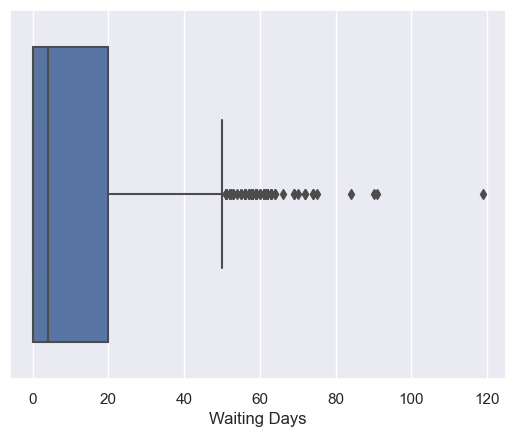

In [332]:
# Plot WaitingDays box plot
sns.boxplot(df["WaitingDays"])
plt.xlabel("Waiting Days")
plt.show()

In [333]:
# Function to find outliers using IQR
# IQR (inter-quartile range) = Q3 - Q1
# upper bound = Q3 + 1.5 * IQR
# lower bound = Q1 – 1.5 * IQR
# An outlier is a value beyond the upper bound or a value below the lower bound
def find_outliers_IQR(df):
    # Write code here
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    outliers = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]   
    return outliers

In [334]:
# Find outliers using find_outliers_IQR() function
outliers = find_outliers_IQR(df['WaitingDays'])
print("number of outliers: " + str(len(outliers)))
print("max outlier value: "  + str(outliers.max()))
print("min outlier value: "  + str(outliers.min()))
df['Outlier'] = outliers
print(df['Outlier'])

number of outliers: 96
max outlier value: 119
min outlier value: 51
0      NaN
1      NaN
2      NaN
3      NaN
5      NaN
        ..
6568   NaN
6569   NaN
6570   NaN
6571   NaN
6572   NaN
Name: Outlier, Length: 6546, dtype: float64


In [335]:
# Position (index) of outliers
# Write code here


print(np.where(df['WaitingDays'] >= outliers.min()))

(array([ 550,  551,  552,  574,  586,  595,  597,  640,  645,  650,  658,
        678,  698,  706,  712,  715,  723,  729,  732,  760,  764,  767,
        771,  776,  793,  803,  813,  816,  822,  827,  832,  835, 1068,
       2612, 2626, 2711, 2713, 2714, 2754, 2755, 2759, 2760, 2761, 2762,
       3019, 3052, 3126, 3129, 3136, 3137, 3138, 3140, 3149, 3152, 3156,
       3159, 3161, 3164, 4392, 4406, 4407, 4907, 6372, 6373, 6374, 6375,
       6376, 6377, 6378, 6379, 6380, 6381, 6382, 6385, 6386, 6389, 6390,
       6395, 6396, 6397, 6398, 6401, 6402, 6405, 6406, 6450, 6451, 6453,
       6456, 6473, 6476, 6482, 6483, 6484, 6491, 6492], dtype=int64),)


In [336]:
# Display any missing values
# Write code here
df.isnull().sum()



PatientID                0
AppointmentID            0
Gender                   0
ScheduleDay              0
AppointmentDay           0
Age                      0
Neighbourhood            0
FamilyAllowance          0
Hypertension             0
Diabetes                 0
Alcoholism               0
Handicap                 0
SMSreceived              0
NoShow                   0
WaitingDays              0
AppointmentWeekDay       0
Outlier               6450
dtype: int64

**Observations**
- No missing values
- Outlier column has NaN or outlier values. Total of 6450 rows.

In [337]:
# Convert NaN to False and True otherwise
# Write code here

df['Outlier'] = np.where(df['Outlier'].isna(), False, True)
print(df['Outlier'])

0       False
1       False
2       False
3       False
5       False
        ...  
6568    False
6569    False
6570    False
6571    False
6572    False
Name: Outlier, Length: 6546, dtype: bool


## Remove Rows with Outliers

In [339]:
# Remove rows with outliers
# Write code here
index_outliers_to_drop = df[df['Outlier'] != False].index
df.drop(index_outliers_to_drop, inplace=True)




<class 'pandas.core.frame.DataFrame'>
Int64Index: 6450 entries, 0 to 6572
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   PatientID           6450 non-null   int64              
 1   AppointmentID       6450 non-null   int64              
 2   Gender              6450 non-null   category           
 3   ScheduleDay         6450 non-null   datetime64[ns, UTC]
 4   AppointmentDay      6450 non-null   datetime64[ns, UTC]
 5   Age                 6450 non-null   int32              
 6   Neighbourhood       6450 non-null   category           
 7   FamilyAllowance     6450 non-null   bool               
 8   Hypertension        6450 non-null   bool               
 9   Diabetes            6450 non-null   bool               
 10  Alcoholism          6450 non-null   bool               
 11  Handicap            6450 non-null   bool               
 12  SMSreceived         6450 non-null 

In [340]:
# Examine data format
# Write code here

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6450 entries, 0 to 6572
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   PatientID           6450 non-null   int64              
 1   AppointmentID       6450 non-null   int64              
 2   Gender              6450 non-null   category           
 3   ScheduleDay         6450 non-null   datetime64[ns, UTC]
 4   AppointmentDay      6450 non-null   datetime64[ns, UTC]
 5   Age                 6450 non-null   int32              
 6   Neighbourhood       6450 non-null   category           
 7   FamilyAllowance     6450 non-null   bool               
 8   Hypertension        6450 non-null   bool               
 9   Diabetes            6450 non-null   bool               
 10  Alcoholism          6450 non-null   bool               
 11  Handicap            6450 non-null   bool               
 12  SMSreceived         6450 non-null 

# Bin Data into Buckets
Add a new feature 'AgeGroup' with buckets whose values are determined by 'Age'.<br>
If Age is 0 to 12, AgeGroup value is Child.<br>
If Age is 13 to 18, AgeGroup value is Adolescence, and so as follows:
-  0-12: Child
- 13-18: Adolescence
- 19-45: YoungAdult
- 46-60: MiddleAge
- \>60: Senior

Hint: Use pandas cut() function where 
- cut_points are -1, 12, 18, 45, 60, 100
- labels are "Child", "Adolescence", "YoungAdult", "MiddleAge", "Senior"
- x is Age, bins is cut_points, labels is labels

In [343]:
# Add a new feature 'AgeGroup' 
# Write code here

cut_points = [-1, 12, 18, 45, 60, 100]
labels = ['Child', 'Adolescence', 'YoungAdult', 'MiddleAge', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], cut_points, labels=labels)


df

,PatientID,AppointmentID,Gender,ScheduleDay,AppointmentDay,Age,Neighbourhood,FamilyAllowance,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow,WaitingDays,AppointmentWeekDay,Outlier,AgeGroup
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0,4,False,Senior
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0,4,False,MiddleAge
2,2978363769149,5671456,F,2016-05-06 17:10:31+00:00,2016-05-12 00:00:00+00:00,21,JARDIM DA PENHA,False,False,False,False,False,True,True,6,3,False,YoungAdult
3,6326444238163,5662931,F,2016-05-05 09:14:10+00:00,2016-05-05 00:00:00+00:00,55,JARDIM DA PENHA,False,True,False,False,False,False,True,0,3,False,MiddleAge
5,848511136446923,5562224,M,2016-04-08 12:56:06+00:00,2016-05-06 00:00:00+00:00,77,JARDIM DA PENHA,False,True,False,True,False,True,True,28,4,False,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6568,15613117122346,5779070,M,2016-06-06 17:42:01+00:00,2016-06-06 00:00:00+00:00,62,JARDIM CAMBURI,False,False,False,False,False,False,True,0,0,False,Senior
6569,19314223565,5767006,F,2016-06-02 16:13:58+00:00,2016-06-07 00:00:00+00:00,55,JARDIM CAMBURI,False,False,False,False,False,True,True,5,1,False,MiddleAge
6570,5965757389437,5771390,F,2016-06-03 12:45:35+00:00,2016-06-07 00:00:00+00:00,56,JARDIM CAMBURI,False,False,False,False,False,True,True,4,1,False,MiddleAge
6571,7825443833792,5767544,F,2016-06-02 18:32:06+00:00,2016-06-07 00:00:00+00:00,60,JARDIM CAMBURI,False,False,False,False,False,True,True,5,1,False,MiddleAge


**Observations**
-  0-12: Child
- 13-18: Adolescence
- 19-45: YoungAdult
- 46-60: MiddleAge
- \>60: Senior

# Save Data File

In [344]:
# To keep data format unchanged every time we open the excel file, it is better to save it as '.xlsx'
for col in df.select_dtypes(['datetimetz']).columns:
    df[col] = df[col].dt.tz_convert(None)

outpath = './data/appointments/appointments-out.xlsx'
df.to_excel(outpath, index=False, header=True)